<a href="https://colab.research.google.com/github/wahyunh10/Superstore-Project/blob/main/Superstore_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **US Superstore Data Exploration**

# **Table of Contents**

---

* Preliminary Wrangling 
1. Data Gathering & Assessing
2. Data Cleaning

* Data Exploration
1. Product Analysis
2. Category Analysis
3. Customers Analysis
4. Time Series Analysis
5. Geospatial Analysis

# **Preliminary Wrangling**

This dataset contains transactions from the sale has recorded in the US Superstore data from 2014-2018.

This Dataset Can Be Viewed At :[Dataset](https://www.kaggle.com/juhi1994/superstore).

This dataset has 21 columns and 9994 rows.

From 21 columns you can know the Customer's Name, Order Date, Product Name, Category, Sub-Category, Selling Price, Discounts, Profits, and Other Columns.

In [1]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.2 MB/s 
     |████████████████████████████████| 16.7 MB 66.9 MB/s 
     |████████████████████████████████| 6.3 MB 65.9 MB/s 


In [3]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=e6d549284271969301b46385e5c10d99a51d53d03fef0e5035e8ce893df56203
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
import geopandas
import warnings
warnings.filterwarnings('ignore')
from adjustText import adjust_text

# **Data Gathering & Assessing**

In [6]:
df = pd.read_excel('US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# high-level overview of data shape and composition
df.shape

(9994, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
#check for duplicated values
df.duplicated().sum()

0

In [10]:
#check for null values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# **Data Cleaning**

In [11]:
# Before cleaning, make copy of original datasets
df_clean = df.copy()

**Issue 1: Missing values in the dataset**

Define **bold text** Drop the null values from the dataset

In [12]:
#drop the null values from dataset
df_clean.dropna(how = 'any', axis = 0, inplace=True)

**Test**

In [13]:
# check whether null values are dropped
df_clean.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Storing cleaned Dataset :**

In [14]:
df_clean.to_csv('cleaned-US-Superstore-data.csv', encoding='utf-8', index=False)

In [15]:
# Read data from csv file and Load it into dataframe
df = pd.read_csv('cleaned-US-Superstore-data.csv')
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9095,9096,US-2015-132836,2015-06-01,2015-06-05,Standard Class,AJ-10945,Ashley Jarboe,Consumer,United States,Detroit,...,48227,Central,TEC-PH-10001300,Technology,Phones,iKross Bluetooth Portable Keyboard + Cell Phon...,41.90,2,0.0,11.7320
5936,5937,CA-2016-103107,2016-07-04,2016-07-04,Same Day,RB-19465,Rick Bensley,Home Office,United States,Seattle,...,98103,West,TEC-PH-10001198,Technology,Phones,Avaya 4621SW VoIP phone,177.48,3,0.2,19.9665


In [16]:
# Brief summary of cleaned DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# **Data Exploration**

**What is the structure of your dataset?**



> The dataset consists of 9994 entries and 21 features



In [17]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


It can be seen that there is a minus on profit column on the transaction data with row ID 4.

After checking with the statistics description, it turns out that the smallest value of profit is -6599.978000.

This indicates the transactions disadvantageous from all transactions recorded in the US Superstore data.

In [18]:
profitDF = df['Profit'] > 0
profitDF = df[profitDF]
profitPercentage = profitDF.shape[0]/df.shape[0]*100
print('Profit Transactions :', profitDF.shape[0], 'Transactions Or', "{:.2f}".format(profitPercentage), '%')

lossesDF = df['Profit'] < 0
lossesDF = df[lossesDF]
lossesPercentage = lossesDF.shape[0]/df.shape[0]*100
print('Losses Transactions :', lossesDF.shape[0], 'Transactions Or', "{:.2f}".format(lossesPercentage), '%')

zeroDF = df['Profit'] == 0
zeroDF = df[zeroDF]
zeroPercentage = zeroDF.shape[0]/df.shape[0]*100
print('Zero Transactions   :', ' ',zeroDF.shape[0], 'Transactions Or ', "{:.2f}".format(zeroPercentage), '%')

Profit Transactions : 8058 Transactions Or 80.63 %
Losses Transactions : 1871 Transactions Or 18.72 %
Zero Transactions   :   65 Transactions Or  0.65 %


After a deeper check it turned out that there were 1871 losses transactions or abaout 18% of all transactions.

Meanwhile, 8058 profitable transactions and there are 65 transactions made 0 profit.

So it needs more deep investigation losses and anythings that can increase profits.


# **Product Analysis**

In [19]:
product = df.groupby(['Product Name', 'Category', 'Sub-Category']).agg({'Sales' : 'mean', 'Quantity' : 'sum', 'Profit' : 'sum'})

In [20]:
profitProduct = product['Profit'] > 0
profitProduct = product[profitProduct]
profitProduct = profitProduct.sort_values('Profit', ascending = False)
profitProduct

,,,Sales,Quantity,Profit
Product Name,Category,Sub-Category,,,
Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,12319.96480,20,2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,Binders,2745.33840,31,7.753039e+03
Hewlett Packard LaserJet 3310 Copier,Technology,Copiers,2354.96075,38,6.983884e+03
Canon PC1060 Personal Laser Copier,Technology,Copiers,2904.95850,19,4.570935e+03
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",Technology,Machines,6124.96500,12,4.094977e+03
...,...,...,...,...,...
Sony 8GB Class 10 Micro SDHC R40 Memory Card,Technology,Accessories,27.19200,3,3.399000e-01
Letter Slitter,Office Supplies,Supplies,5.04000,4,3.024000e-01
Bagged Rubber Bands,Office Supplies,Fasteners,5.14080,21,3.024000e-01


In [21]:
print('Total Profit From Product :', profitProduct['Profit'].sum())

Total Profit From Product : 363465.40249999997


In the profit product table, shows all the products name that were sold from the US Superstore data.

There are 1547 different products sold and generated profit about 363465.40.

In [22]:
bestProduct = profitProduct.head(10)
bestProduct

,,,Sales,Quantity,Profit
Product Name,Category,Sub-Category,,,
Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,12319.964800,20,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,Binders,2745.338400,31,7753.0390
Hewlett Packard LaserJet 3310 Copier,Technology,Copiers,2354.960750,38,6983.8836
Canon PC1060 Personal Laser Copier,Technology,Copiers,2904.958500,19,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",Technology,Machines,6124.965000,12,4094.9766
Ativa V4110MDD Micro-Cut Shredder,Technology,Machines,3849.945000,11,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,Machines,7149.945000,11,3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,Technology,Accessories,1338.184286,24,3696.2820
Ibico EPK-21 Electric Binding System,Office Supplies,Binders,5291.972000,13,3345.2823



From 1547 profitable products in the profit product table, show 10 products that generated the biggest profits.

Canon ImageCLASS 2200 advanced copier is the product that producs the biggest profit, with 25199.92 of 20 products sold.

Followed by followers PB500 electric punch plastic comb binding machine with manual bind with 7753.03, Hewlwtt Packcard Laser Jet 3310 Copier with 6983.88, and 7 other products.

In [23]:
lossProduct = product['Profit'] < 0
lossProduct = product[lossProduct]
lossProduct = lossProduct.sort_values('Profit', ascending = True)
lossProduct

,,,Sales,Quantity,Profit
Product Name,Category,Sub-Category,,,
Cubify CubeX 3D Printer Double Head Print,Technology,Machines,3699.987667,9,-8.879970e+03
Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,4207.475250,18,-4.589973e+03
Cubify CubeX 3D Printer Triple Head Print,Technology,Machines,7999.980000,4,-3.839990e+03
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,Furniture,Tables,1983.528000,27,-2.876116e+03
Bush Advantage Collection Racetrack Conference Table,Furniture,Tables,1363.532143,33,-1.934398e+03
...,...,...,...,...,...
"Brites Rubber Bands, 1 1/2 oz. Box",Office Supplies,Fasteners,4.356000,7,-5.148000e-01
Rubber Band Ball,Office Supplies,Fasteners,14.586000,16,-2.992000e-01
"Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 9 1/2"" X 11""",Office Supplies,Binders,15.736500,23,-1.614000e-01


In [24]:
print('Total Losses From Product :', lossProduct['Profit'].sum())

Total Losses From Product : -77068.38080000001


In the loss products table above, there are 301 lines, which indicate products with minus profit with -77068.38


In [25]:
worstProduct = lossProduct.head(10)
worstProduct

,,,Sales,Quantity,Profit
Product Name,Category,Sub-Category,,,
Cubify CubeX 3D Printer Double Head Print,Technology,Machines,3699.987667,9,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,4207.475250,18,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,Technology,Machines,7999.980000,4,-3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,Furniture,Tables,1983.528000,27,-2876.1156
Bush Advantage Collection Racetrack Conference Table,Furniture,Tables,1363.532143,33,-1934.3976
GBC DocuBind P400 Electric Binding System,Office Supplies,Binders,2994.178000,27,-1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit,Technology,Machines,22638.480000,6,-1811.0784
Martin Yale Chadless Opener Electric Letter Opener,Office Supplies,Supplies,2776.033333,22,-1299.1836
Balt Solid Wood Round Tables,Furniture,Tables,1629.688500,19,-1201.0581


From the 301 losses products. thee worst product table shows the 10 products with the biggest losses.

Cubify Cubex 3D Printer Double Head Print is the product with the biggest losses with -8879.97.

Then, The Lexmax Mx611dhe Monochrome Laser Printer with -4589.97 and Cubify Cubex 3D Printer Triple Head Print with -3839.99.

In [26]:
zeroProduct = product['Profit'] == 0
zeroProduct = product[zeroProduct]
zeroProduct

,,,Sales,Quantity,Profit
Product Name,Category,Sub-Category,,,
"Alliance Big Bands Rubber Bands, 12/Pack",Office Supplies,Fasteners,7.425,15,0.0
Belkin OmniView SE Rackmount Kit,Office Supplies,Storage,124.180,7,0.0


Beside products that generate profits and losses, there are also products that do not produce anything from the transaction. 

Alliance Big Bands Rubber Bands and Belkin Omniview SE Rackmount Kit.

# **Category Analysis**

In [27]:
category = df.groupby(['Category', 'Sub-Category']).agg({'Sales' : 'mean', 'Quantity' : 'sum', 'Profit' : 'sum'})

In [28]:
profitCategory = category['Profit'] > 0
profitCategory = category[profitCategory]
profitCategory = profitCategory.sort_values('Profit', ascending = False)
profitCategory

Sales  Quantity      Profit
Category        Sub-Category                                   
Technology      Copiers       2198.941618       234  55617.8249
                Phones         371.211534      3289  44515.7306
                Accessories    215.974604      2976  41936.6357
Office Supplies Paper           57.284092      5178  34053.5693
                Binders        133.560560      5974  30221.7633
Furniture       Chairs         532.332420      2356  26590.1663
Office Supplies Storage        264.590553      3158  21278.8264
                Appliances     230.755710      1729  18138.0054
Furniture       Furnishings     95.825668      3563  13059.1436
Office Supplies Envelopes       64.867724       906   6964.1767
                Art             34.068834      3000   6527.7870
                Labels          34.303055      1400   5546.2540
Technology      Machines      1645.553313       440   3384.7569
Office Supplies Fasteners       13.936774       914    949.5182

From 1850 products in this US Superstore Dataset, both losses and profits products.

Be devided into 3 categories, that is Technology, Furniture, and Office Supplies.

In the profit category, Displays The Amount of Profit generated from each category and sub-category.

Technology becomes the biggest profit contribution category and make 3 sub-categories from technology as the top of the sub-category with the biggest income.

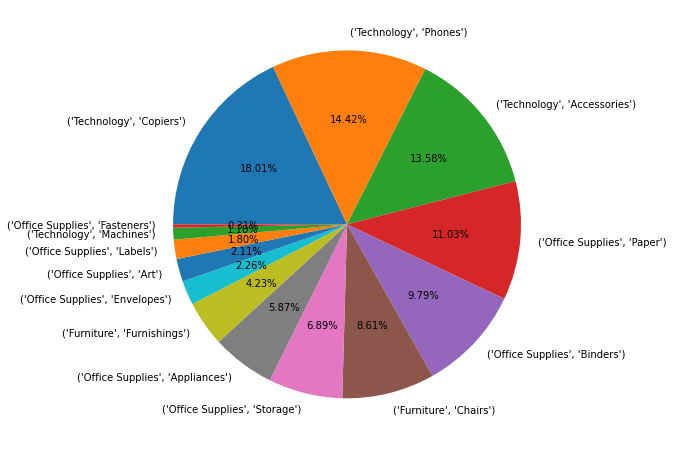

In [29]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.pie(profitCategory['Profit'], labels = profitCategory.index, autopct='%1.2f%%', startangle = 180, counterclock = False)
plt.show()

On the pie chart displaying the percentage of profit generated by each category and sub-category.

Technology with sub-categories of copiers, phones and accesories are the 3 biggest owner of the highest profit with each percentages 18.01%,14.42% and 13.58%.

The, followed by the office supplies category through twi sub-categories, paper and binders with a percentage of 11.03% and 9,79%.

There is furniture with chairs sub-category which has a percentage of 8.69%.

The, filled by each categoty and sub-category according to the percentage of profits generated by categoru and sub-category.

In [30]:
lossCategory = category['Profit'] < 0
lossCategory = category[lossCategory]
lossCategory = lossCategory.sort_values('Profit', ascending = True)
lossCategory

Sales  Quantity      Profit
Category        Sub-Category                                  
Furniture       Tables        648.794771      1241 -17725.4811
                Bookcases     503.859633       868  -3472.5560
Office Supplies Supplies      245.650200       647  -1189.0995

Besides categories and sub-categories that generate profits, there are also categories and sub-categories that cause losses.

Furniture is the category with the biggest losses through its two sub-categories, tables and bookcases with losses of -17725.48 and -3472.55.

Meanwhile, office supplies with supplies sub-category caused losses of -1189.10.

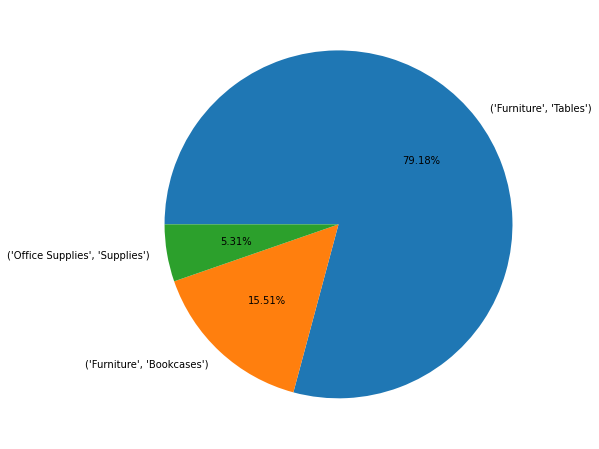

In [31]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.pie(abs(lossCategory['Profit']), labels = lossCategory.index, autopct='%1.2f%%', startangle = 180, counterclock = False)
plt.show()

The pie chart above shows the percentage of losses from categories and sub-categoris.

Furniture with two sub-categories, that is tables and bookcases, was the biggest contributor to losses with 79.19% and 15.51%. 

Meanwhile, office supplies with supplies sub-category was only 5,31%.

# **Customers Analysis**

In [32]:
customer = df.groupby('Customer Name').agg({'Sales' : 'mean', 'Quantity' : 'sum', 'Profit' : 'sum'})
customer

,Sales,Quantity,Profit
Customer Name,,,
Aaron Bergman,147.692667,13,129.3465
Aaron Hawkins,158.609091,54,365.2152
Aaron Smayling,305.069200,48,-253.5746
Adam Bellavance,430.867778,56,2054.5885
Adam Hart,162.516850,75,281.1890
...,...,...,...
Xylona Preis,84.809214,100,621.2300
Yana Sorensen,560.037000,58,1778.2923
Yoseph Carroll,681.793750,31,1305.6290


In [33]:
print('Total Customers Is :' , customer.shape[0])

Total Customers Is : 793


From 9994 transactions was recorded at the US Superstore Dataset, it turn out that all of these transactions came from 793 customers from all region in the U.S.

The names of the customers are displayed in the customer table above.

In [34]:
profitCustomer = customer['Profit'] > 0
profitCustomer = customer[profitCustomer]
profitCustomer = profitCustomer.sort_values('Profit', ascending = False)
profitCustomer

,Sales,Quantity,Profit
Customer Name,,,
Tamara Chand,1587.684833,42,8981.3239
Raymond Buch,839.852167,71,6976.0959
Sanjit Chand,642.833364,87,5757.4119
Hunter Lopez,1170.299818,50,5622.4292
Adrian Barton,723.678550,73,5444.8055
...,...,...,...
Carl Jackson,16.520000,5,1.6520
Eric Barreto,134.942857,24,0.6042
Lela Donovan,5.304000,3,0.4641


In [35]:
totalProfitCustomer = profitCustomer.shape[0]
percentageProfitCustomer = profitCustomer.shape[0]/customer.shape[0]*100

print('Total Profit Customer Is :', totalProfitCustomer, ' Customers Or ', "{:.2f}".format(percentageProfitCustomer), '%')

Total Profit Customer Is : 638  Customers Or  80.45 %


From 793 customers, it turned out that there were 638 customers who gave a profit, or about 80.45%.

The names of these customers are displayed in the profit customer table above.

In [36]:
bestCustomer = profitCustomer.head(10)
bestCustomer

,Sales,Quantity,Profit
Customer Name,,,
Tamara Chand,1587.684833,42,8981.3239
Raymond Buch,839.852167,71,6976.0959
Sanjit Chand,642.833364,87,5757.4119
Hunter Lopez,1170.299818,50,5622.4292
Adrian Barton,723.678550,73,5444.8055
Tom Ashbrook,1459.562000,36,4703.7883
Christopher Martinez,895.402000,34,3899.8904
Keith Dawkins,292.187714,84,3038.6254
Andy Reiter,734.272000,33,2884.6208


The best customer table above shows the 10 customes who provide the greatest profit from their transactions in the US Superstore.

Tamara Chand, with 42 products she bought, became the best customer giving a profit of 8981.32.

Then there is raymond buch after giving a profit of 69.76.09 and Sanjit Chand with 5757.41.

Hunter Lopes, Adrian Barton and other customers followed below the top three customers.

In [37]:
lossCustomer = customer['Profit'] < 0
lossCustomer = customer[lossCustomer]
lossCustomer = lossCustomer.sort_values('Profit', ascending = True)
lossCustomer

,Sales,Quantity,Profit
Customer Name,,,
Cindy Stewart,632.228333,40,-6626.3895
Grant Thornton,1558.535333,26,-4108.6589
Luke Foster,245.656812,69,-3583.9770
Sharelle Roach,359.275667,34,-3333.9144
Henry Goldwyn,191.037765,68,-2797.9635
...,...,...,...
Thais Sissman,2.416500,4,-3.3156
Adrian Hane,108.469625,65,-2.3146
Mitch Gastineau,8.369500,8,-1.2453


In [38]:
totalLossCustomer = lossCustomer.shape[0]
percentageLossCustomer = lossCustomer.shape[0]/customer.shape[0]*100

print('Total Loss Customer Is :', totalLossCustomer, ' Customers Or ', "{:.2f}".format(percentageLossCustomer), '%')

Total Loss Customer Is : 155  Customers Or  19.55 %


Beside 638 customers who provide benefits. There are also 155 customers who even give a loss or aboun 19.55%

This is a bad news where there are lots of losses from the customers. 

The names of cutomers who caused loesses are shown in the loss customer table above

In [39]:
worstCustomer = lossCustomer.head(10)
worstCustomer

,Sales,Quantity,Profit
Customer Name,,,
Cindy Stewart,632.228333,40,-6626.3895
Grant Thornton,1558.535333,26,-4108.6589
Luke Foster,245.656812,69,-3583.9770
Sharelle Roach,359.275667,34,-3333.9144
Henry Goldwyn,191.037765,68,-2797.9635
Nathan Cano,158.499286,38,-2204.8072
Sean Braxton,473.993588,84,-2082.7451
Sean Miller,1669.536667,50,-1980.7393
Christine Phan,392.551667,59,-1850.3029


The worst customer table display 10 customers who gave the biggest losses.

Cindy Stewart, who bough 40 items, resulted in a loss of -6626.38

Meanwhile, Grant Thornton was at a losses by -4108.65

Then Luke Foster with -3583.97 and the 7 other customers.

# **Time Series Analysis**

In [48]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [49]:
df['Order Date'] = pd.to_datetime(df['Order Date'].dt.strftime('%Y-%m'))
order = df.groupby('Order Date')['Sales', 'Quantity', 'Profit'].sum()

print('Recorded Transaction Time :', order.shape[0], 'Month')

print('\n')

fisrtMonthProfit = order.loc['2014-01-01', 'Profit']
lastMonthProfit = order.loc['2017-12-01', 'Profit']

print('First Month Profit :', fisrtMonthProfit)
print('Last Month Profit :', lastMonthProfit)

print('\n')
      
profitIncreasePercentage = ((lastMonthProfit - 
                            fisrtMonthProfit
                           )/fisrtMonthProfit) * 100

print('Profit Increase Percentage :', "{:.2f}".format(profitIncreasePercentage), '%')

Recorded Transaction Time : 48 Month


First Month Profit : 2450.1906999999997
Last Month Profit : 8483.3468


Profit Increase Percentage : 246.23 %


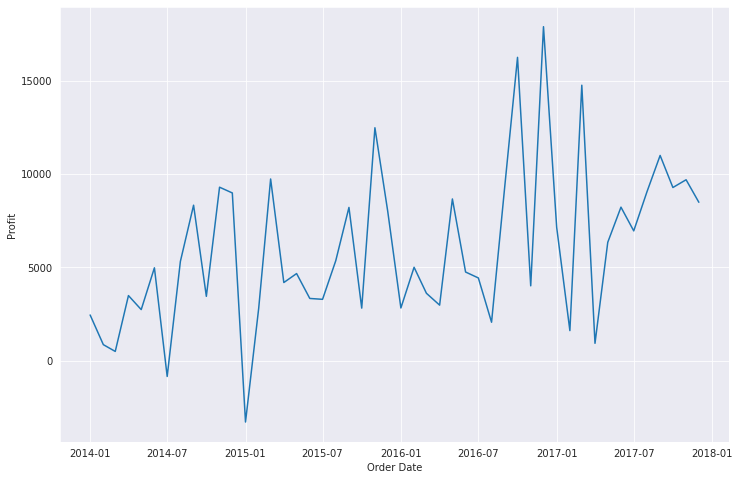

In [50]:
plt.figure(figsize = (12,8), )
with sns.axes_style('darkgrid'):
    sns.lineplot(x = order.index, y = 'Profit', data = order)
plt.show()

The time series chart above shows the profit increase chart recorded on the US Superstore Dataset.

From 48 months of transaction, there was an increase in the percentage of profits by 246.23%

However, there were still losess in july 2014 and January 2015.

So it needs to be evaluated again so that there will be no further losses.

# **Geospatial Analysis**

In [42]:
state = df.groupby('State')['Sales', 'Quantity', 'Profit'].sum()
state

,Sales,Quantity,Profit
State,,,
Alabama,19510.6400,256,5786.8253
Arizona,35282.0010,862,-3427.9246
Arkansas,11678.1300,240,4008.6871
California,457687.6315,7667,76381.3871
Colorado,32108.1180,693,-6527.8579
Connecticut,13384.3570,281,3511.4918
Delaware,27451.0690,367,9977.3748
District of Columbia,2865.0200,40,1059.5893
Florida,89473.7080,1379,-3399.3017


In [43]:
maps = geopandas.read_file('../input/usa-geopackage/gadm36_USA.gpkg', layer = 'gadm36_USA_1')
maps.head(3)

DriverError: ignored

In [44]:
profitMaps = pd.merge(state, maps, left_on = 'State', right_on = 'NAME_1', how = 'inner')
profitMaps = geopandas.GeoDataFrame(profitMaps)
profitMaps['Position'] = profitMaps['geometry'].representative_point()

NameError: ignored

In [45]:
profitByState = profitMaps.plot(column = 'Profit', cmap = 'ocean_r', edgecolor = 'black', 
              linewidth = 0.2, figsize = (14,10), legend = True, 
              legend_kwds = {'label' : 'Profit', 'orientation' : 'vertical'})
profitByState.set_title('Profit By State')
profitByState.set_xlabel('Longitude')
profitByState.set_ylabel('Latitude')

label = []

for stateName, position in zip(profitMaps['NAME_1'], profitMaps['Position']):
    label.append(profitByState.text(position.x, position.y, stateName, fontsize = 10))
    
adjust_text(label)

plt.show()

NameError: ignored

The map image above shows the state in th US.

Each state has a different color according to the profit made by the each stae that can be seen in the bar next to the map.

California and New York are two of the highest profit countries marked in the green on the map.

Meanwhile, texas becomes the state that cause the biggest losses, so it is marked in white.